In [1]:
import matplotlib.pyplot as plt
import pickle
import pandas as pd
import numpy as np
import seaborn as sns

SNR_dB = list(range(0, 25, 5))
y_lim_angle = [.003,1]
y_lim_range = [0, 3]
x_lim = [min(SNR_dB),max(SNR_dB)]

### Load all the results

In [37]:
model_path = 'saved_models/single_user/'
csv_filename = 'test_rmse.csv' # 'test_rmse.csv', or 'best_rmse_epoch.csv'

# results obtained with distance from [1,20] m
# rmse_dnn_hyb_fully_RF16 = pd.read_csv(model_path + 'fully-connected_epochs80_batch250_lr0.001_16RF_128N_/' + csv_filename)
# rmse_dnn_hyb_fully_RF8 = pd.read_csv(model_path + 'fully-connected_epochs80_batch250_lr0.001_8RF_128N_/' + csv_filename)
# rmse_dnn_hyb_sub_RF16 = pd.read_csv(model_path + 'sub-connected_epochs200_batch250_lr0.001_16RF_128N_scheduler0150/' + csv_filename)
# rmse_dnn_hyb_sub_RF8 = pd.read_csv(model_path + 'sub-connected_epochs200_batch250_lr0.001_8RF_128N_scheduler0150/' + csv_filename)

# hybrid beamformer: reducing the maximum distance from 20m -> 10m

model_path = 'saved_models/single_user/CNN/'
rmse_CNN_dnn_hyb_sub_RF16_rmax10m_N128 = pd.read_csv(model_path + 'sub-connected_epochs60_batch250_lr0.003_16RF_128N_real_imag1/'+csv_filename)
rmse_CNN_dnn_fullyd_RF16_rmax10m_N128 = pd.read_csv(model_path + 'sub-connected_epochs60_batch250_lr0.003_128RF_128N_real_imag/best_rmse_epoch.csv')

## Varying the number of ANTENNAS N
# hybrid beamformer: fully- sub- and inter-connected
model_path = 'saved_models/single_user/N/'
rmse_dnn_hyb_fully_RF16_rmax10m_N128 = pd.read_csv(model_path + 'fully-connected_epochs200_batch250_lr0.003_16RF_128N_rmax10m/'+csv_filename)
rmse_dnn_hyb_fully_RF16_rmax10m_N256 = pd.read_csv(model_path + 'fully-connected_epochs200_batch250_lr0.003_16RF_256N_rmax10m/'+csv_filename)
rmse_dnn_hyb_fully_RF16_rmax10m_N512 = pd.read_csv(model_path + 'fully-connected_epochs200_batch250_lr0.003_16RF_512N_rmax10m/'+csv_filename)
rmse_dnn_hyb_sub_RF16_rmax10m_N128 = pd.read_csv(model_path + 'sub-connected_epochs200_batch250_lr0.003_16RF_128N_/'+csv_filename)
rmse_dnn_hyb_sub_RF16_rmax10m_N256 = pd.read_csv(model_path + 'sub-connected_epochs200_batch250_lr0.003_16RF_256N_/'+csv_filename)
rmse_dnn_hyb_sub_RF16_rmax10m_N512 = pd.read_csv(model_path + 'sub-connected_epochs200_batch250_lr0.003_16RF_512N_/'+csv_filename)
rmse_dnn_hyb_inter_RF16_rmax10m_N128 = pd.read_csv(model_path + 'inter-connected_epochs200_batch250_lr0.003_16RF_128N_/'+csv_filename)
rmse_dnn_hyb_inter_RF16_rmax10m_N256 = pd.read_csv(model_path + 'inter-connected_epochs200_batch250_lr0.003_16RF_256N_/'+csv_filename)
rmse_dnn_hyb_inter_RF16_rmax10m_N512 = pd.read_csv(model_path + 'inter-connected_epochs200_batch250_lr0.003_16RF_512N_/'+csv_filename)

# training the sub-connected on HIGH SNR ONLY
rmse_dnn_hyb_sub_RF16_rmax10m_N128_high_snr = pd.read_csv('saved_models/single_user/sub-connected_epochs200_batch250_lr0.003_16RF_128N_high_snr/'+csv_filename) # trained only on high snr values

# varying the number of RF CHAINS N_RF
model_path = 'saved_models/single_user/N_RF/'
# rmse_dnn_hyb_sub_RF8_rmax10m_N128 = pd.read_csv(model_path + 'sub-connected_epochs200_batch250_lr0.003_8RF_128N_/'+csv_filename) # DNN trained but not finetuned
# rmse_dnn_hyb_sub_RF16_rmax10m_N128 = pd.read_csv(model_path + 'sub-connected_epochs200_batch250_lr0.003_16RF_128N_/'+csv_filename)
# rmse_dnn_hyb_sub_RF32_rmax10m_N128 = pd.read_csv(model_path + 'sub-connected_epochs200_batch250_lr0.003_32RF_128N_/'+csv_filename)
# rmse_dnn_hyb_sub_RF64_rmax10m_N128 = pd.read_csv(model_path + 'sub-connected_epochs200_batch250_lr0.003_64RF_128N_/'+csv_filename)
rmse_dnn_hyb_sub_RF64_rmax10m_N128_256hidden = pd.read_csv(model_path + 'sub-connected_epochs200_batch256_lr0.003_64RF_128N_256hidden/'+csv_filename)
rmse_dnn_fully_RF128_rmax10m_N128_256hidden = pd.read_csv(model_path + 'sub-connected_epochs200_batch256_lr0.001_128RF_128N_256hidden/'+csv_filename)
rmse_dnn_fully_RF128_rmax10m_N128_decoderNet = pd.read_csv(model_path + 'sub-connected_epochs300_batch256_lr0.001_128RF_128N_decoderNet/'+csv_filename)
rmse_sub_RF08 = pd.read_csv(model_path + 'sub-connected_epochs300_batch256_lr0.001_8RF_128N_decoderNet/'+csv_filename) # finetuned DNN
rmse_sub_RF16 = pd.read_csv(model_path + 'sub-connected_epochs300_batch256_lr0.001_16RF_128N_decoderNet/'+csv_filename)
rmse_sub_RF32 = pd.read_csv(model_path + 'sub-connected_epochs300_batch256_lr0.001_32RF_128N_decoderNet/'+csv_filename)
rmse_sub_RF64 = pd.read_csv(model_path + 'sub-connected_epochs300_batch256_lr0.001_64RF_128N_decoderNet/'+csv_filename)

# MULTIPATH: estimation of (theta,r) of the source, and (theta_scat,r_scat) of a scatterer (simulating the strongest component of multipath)
model_path = 'saved_models/multipath/'
rmse_dnn_hyb_sub_RF16_rmax10m_N128_multipath_high_snr = pd.read_csv(model_path + 'sub-connected_epochs200_batch250_lr0.003_16RF_128N_high_snr/'+csv_filename)
rmse_dnn_hyb_sub_RF16_rmax10m_N128_multipath =          pd.read_csv(model_path + 'sub-connected_epochs200_batch250_lr0.003_16RF_128N_scat/'+csv_filename)
rmse_dnn_hyb_sub_RF64_rmax10m_N128_multipath_256hidden = pd.read_csv('saved_models/multipath/sub-connected_epochs200_batch250_lr0.003_64RF_128N_scat_256hidden/'+csv_filename) # trained only on high snr values

# fully-digital (maximum likelihood)
model_path = 'saved_models/maximum_likelihood/'
# N = 64 antennas
maximum_likelihood_N64_rmse_r = np.load(model_path + 'rmse_r_N64_128_10.npy')
maximum_likelihood_N64_rmse_theta_deg = np.load(model_path + 'rmse_theta_deg_N64_128_10.npy')
maximum_likelihood_N64_rmse_theta_rad = np.load(model_path + 'rmse_theta_rad_N64_128_10.npy')
maximum_likelihood_N64_rmse_pos = np.load(model_path + 'rmse_pos_N64_128_10.npy')
# N = 128 antennas
maximum_likelihood_N128_rmse_r = np.load(model_path + 'rmse_r_N128_128_10.npy')
maximum_likelihood_N128_rmse_theta_deg = np.load(model_path + 'rmse_theta_deg_N128_128_10.npy')
maximum_likelihood_N128_rmse_theta_rad = np.load(model_path + 'rmse_theta_rad_N128_128_10.npy')
maximum_likelihood_N128_rmse_pos = np.load(model_path + 'rmse_pos_N128_128_10.npy')
rmse_ML = pd.read_csv(model_path + 'rmse_ML_N128_128_50.csv')

# Hybrid Beamforming Configurations
Fully-connected, Sub-connected, Inter-connected

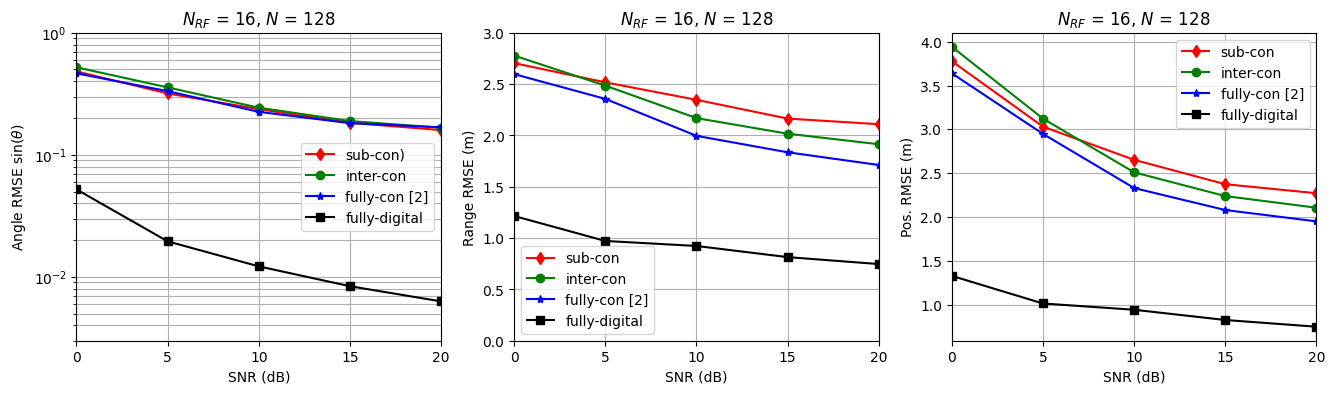

In [8]:
plt.figure(figsize=(16,4))
plt.subplot(132)
plt.title(r'$N_{RF}$ = 16, $N$ = 128')
plt.plot(SNR_dB,rmse_dnn_hyb_sub_RF16_rmax10m_N128['Test (r)'],'-dr',label='sub-con')
# plt.plot(SNR_dB,rmse_CNN_dnn_hyb_sub_RF16_rmax10m_N128['Test (r)'],'--dr',label='sub-con CNN')
plt.plot(SNR_dB,rmse_dnn_hyb_inter_RF16_rmax10m_N128['Test (r)'],'-og',label='inter-con')
plt.plot(SNR_dB,rmse_dnn_hyb_fully_RF16_rmax10m_N128['Test (r)'],'-*b',label='fully-con [2]')
# plt.plot(SNR_dB[-2:],rmse_dnn_hyb_sub_RF16_rmax10m_N128_high_snr['Test (r)'],'-.db',label='sub-con) high snr')
plt.plot(SNR_dB, maximum_likelihood_N128_rmse_r,'-sk',label=f'fully-digital')
plt.xticks(SNR_dB)
plt.ylim(y_lim_range)
plt.xlim(x_lim)
plt.xlabel('SNR (dB)')
plt.ylabel('Range RMSE (m)')
plt.legend()
plt.grid()

# RMSE ANGLE
plt.subplot(131)
plt.title(r'$N_{RF}$ = 16, $N$ = 128')
plt.plot(SNR_dB,np.sin(rmse_dnn_hyb_sub_RF16_rmax10m_N128['Test (theta)']/180*np.pi),'-dr',label='sub-con)')
# plt.plot(SNR_dB,np.sin(rmse_CNN_dnn_hyb_sub_RF16_rmax10m_N128['Test (theta)']/180*np.pi),'--dr',label='sub-con)')
plt.plot(SNR_dB,np.sin(rmse_dnn_hyb_inter_RF16_rmax10m_N128['Test (theta)']/180*np.pi),'-og',label='inter-con')
plt.plot(SNR_dB,np.sin(rmse_dnn_hyb_fully_RF16_rmax10m_N128['Test (theta)']/180*np.pi),'-*b',label='fully-con [2]')
# plt.plot(SNR_dB[-2:],np.sin(rmse_dnn_hyb_sub_RF16_rmax10m_N128_high_snr['Test (theta)']/180*np.pi),'-.db',label='sub-con) high snr')
plt.plot(SNR_dB, np.sin(maximum_likelihood_N128_rmse_theta_rad),'-sk',label=f'fully-digital')
plt.xticks(SNR_dB)
plt.yscale('log')
plt.ylim(y_lim_angle)
plt.xlim(x_lim)
plt.grid(True,which='both')
plt.xlabel('SNR (dB)')
plt.ylabel(r'Angle RMSE sin($\theta$)')
plt.legend()

# plt.subplot(131)
# plt.title(r'$N_{RF}$ = 16, $N$ = 128')
# plt.plot(SNR_dB,rmse_dnn_hyb_sub_RF16_rmax10m_N128['Test (theta)'],'-dr',label='sub-con')
# plt.plot(SNR_dB,rmse_dnn_hyb_inter_RF16_rmax10m_N128['Test (theta)'],'-og',label='inter-con')
# plt.plot(SNR_dB,rmse_dnn_hyb_fully_RF16_rmax10m_N128['Test (theta)'],'-*b',label='fully-con')
# # plt.plot(SNR_dB[-2:],rmse_dnn_hyb_sub_RF16_rmax10m_N128_high_snr['Test (theta)'],'-.db',label='sub-con) high snr')
# plt.plot(SNR_dB, maximum_likelihood_N128_rmse_theta_deg,'-sk',label=f'fully-digital')
# plt.xticks(SNR_dB)
# # plt.yscale('log')
# # plt.ylim(y_lim_angle)
# plt.xlim(x_lim)
# plt.grid(True,which='both')
# plt.xlabel('SNR (dB)')
# plt.ylabel(r'RMSE ($\theta$)')
# plt.legend()

# RMSE POSITION
plt.subplot(133)
plt.title(r'$N_{RF}$ = 16, $N$ = 128')
plt.plot(SNR_dB,rmse_dnn_hyb_sub_RF16_rmax10m_N128['Test (pos)'],'-dr',label='sub-con')
# plt.plot(SNR_dB,rmse_CNN_dnn_hyb_sub_RF16_rmax10m_N128['Test (pos)'],'--dr',label='sub-con CNN')
plt.plot(SNR_dB,rmse_dnn_hyb_inter_RF16_rmax10m_N128['Test (pos)'],'-og',label='inter-con')
plt.plot(SNR_dB,rmse_dnn_hyb_fully_RF16_rmax10m_N128['Test (pos)'],'-*b',label='fully-con [2]')
# plt.plot(SNR_dB[-2:],rmse_dnn_hyb_sub_RF16_rmax10m_N128_high_snr['Test (theta)'],'-.db',label='sub-con) high snr')
plt.plot(SNR_dB, maximum_likelihood_N128_rmse_pos,'-sk',label=f'fully-digital')
plt.xticks(SNR_dB)
# plt.yscale('log')
# plt.ylim(y_lim_angle)
plt.xlim(x_lim)
# plt.grid(True,which='both')
plt.grid()
plt.xlabel('SNR (dB)')
plt.ylabel('Pos. RMSE (m)')
plt.legend()
plt.show()

# Varying N (antennas)

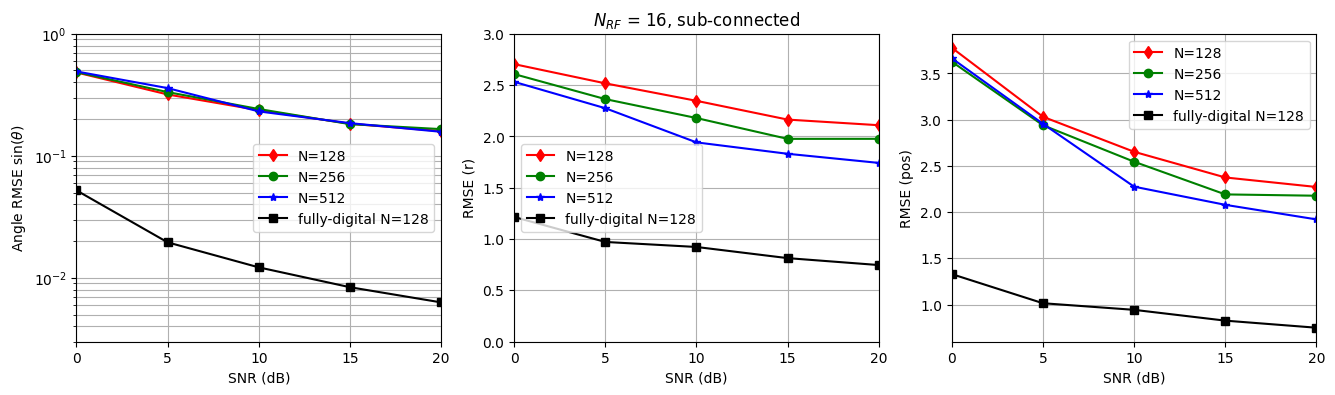

In [72]:
plt.figure(figsize=(16,4))
plt.subplot(132)
plt.title(r'$N_{RF}$ = 16, sub-connected')
# plt.plot(SNR_dB,rmse_dnn_hyb_fully_RF16_rmax10m_N128['Test (r)'],'--*r',label='N=128 (fully-con)')
plt.plot(SNR_dB,rmse_dnn_hyb_sub_RF16_rmax10m_N128['Test (r)'],'-dr',label='N=128')
# plt.plot(SNR_dB,rmse_dnn_hyb_inter_RF16_rmax10m_N128['Test (r)'],'-or',label='N=128 (inter-con)')

# plt.plot(SNR_dB,rmse_dnn_hyb_fully_RF16_rmax10m_N256['Test (r)'],'--*g',label='N=256 (fully-con)')
plt.plot(SNR_dB,rmse_dnn_hyb_sub_RF16_rmax10m_N256['Test (r)'],'-og',label='N=256')
# plt.plot(SNR_dB,rmse_dnn_hyb_inter_RF16_rmax10m_N256['Test (r)'],'-og',label='N=256 (inter-con)')

# plt.plot(SNR_dB,rmse_dnn_hyb_fully_RF16_rmax10m_N512['Test (r)'],'--*b',label='N=512 (fully-con)')
# plt.plot(SNR_dB,rmse_dnn_hyb_inter_RF16_rmax10m_N512['Test (r)'],'-ob',label='N=512 (inter-con)')
plt.plot(SNR_dB,rmse_dnn_hyb_sub_RF16_rmax10m_N512['Test (r)'],'-*b',label='N=512')

plt.plot(SNR_dB, maximum_likelihood_N128_rmse_r,'-sk',label=f'fully-digital N=128')
plt.xticks(SNR_dB)
plt.ylim(y_lim_range)
plt.xlim(x_lim)
plt.xlabel('SNR (dB)')
plt.ylabel('RMSE (r)')
plt.legend()
plt.grid()

# RMSE ANGLE
plt.subplot(131)
# plt.plot(SNR_dB,np.sin(rmse_dnn_hyb_fully_RF16_rmax10m_N128['Test (theta)']/180*np.pi),'--*r',label='N=128 (fully-con)')
# plt.plot(SNR_dB,np.sin(rmse_dnn_hyb_inter_RF16_rmax10m_N128['Test (theta)']/180*np.pi),'-or',label='N=128 (inter-con)')
plt.plot(SNR_dB,np.sin(rmse_dnn_hyb_sub_RF16_rmax10m_N128['Test (theta)']/180*np.pi),'-dr',label='N=128')

# plt.plot(SNR_dB,np.sin(rmse_dnn_hyb_fully_RF16_rmax10m_N256['Test (theta)']/180*np.pi),'--*g',label='N=256 (fully-con)')
# plt.plot(SNR_dB,np.sin(rmse_dnn_hyb_inter_RF16_rmax10m_N256['Test (theta)']/180*np.pi),'-og',label='N=256 (inter-con)')
plt.plot(SNR_dB,np.sin(rmse_dnn_hyb_sub_RF16_rmax10m_N256['Test (theta)']/180*np.pi),'-og',label='N=256')

# plt.plot(SNR_dB,np.sin(rmse_dnn_hyb_fully_RF16_rmax10m_N512['Test (theta)']/180*np.pi),'--*b',label='N=512 (fully-con)')
# plt.plot(SNR_dB,np.sin(rmse_dnn_hyb_inter_RF16_rmax10m_N512['Test (theta)']/180*np.pi),'-ob',label='N=512 (inter-con)')
plt.plot(SNR_dB,np.sin(rmse_dnn_hyb_sub_RF16_rmax10m_N512['Test (theta)']/180*np.pi),'-*b',label='N=512')

plt.plot(SNR_dB, np.sin(maximum_likelihood_N128_rmse_theta_rad),'-sk',label=f'fully-digital N=128')
plt.xticks(SNR_dB)
plt.yscale('log')
plt.ylim(y_lim_angle)
plt.xlim(x_lim)
plt.grid(True,which='both')
plt.xlabel('SNR (dB)')
plt.ylabel(r'Angle RMSE sin($\theta$)')
plt.legend()

# plt.subplot(131)
# plt.plot(SNR_dB,rmse_dnn_hyb_sub_RF16_rmax10m_N128['Test (theta)'],'-dr',label='N=128')
# plt.plot(SNR_dB,rmse_dnn_hyb_sub_RF16_rmax10m_N256['Test (theta)'],'-og',label='N=256')
# plt.plot(SNR_dB,rmse_dnn_hyb_sub_RF16_rmax10m_N512['Test (theta)'],'-*b',label='N=512')
# plt.plot(SNR_dB, maximum_likelihood_N128_rmse_theta_deg,'-sk',label=f'fully-digital N=128')
# plt.xticks(SNR_dB)
# # plt.yscale('log')
# # plt.ylim(y_lim_angle)
# plt.xlim(x_lim)
# plt.grid(True,which='both')
# plt.xlabel('SNR (dB)')
# plt.ylabel(r'Angle RMSE sin($\theta$)')
# plt.legend()

# RMSE POSITION
plt.subplot(133)
# plt.plot(SNR_dB,rmse_dnn_hyb_fully_RF16_rmax10m_N128['Test (theta)'],'--*r',label='N=128 (fully-con)')
# plt.plot(SNR_dB,rmse_dnn_hyb_inter_RF16_rmax10m_N128['Test (theta)'],'-or',label='N=128 (inter-con)')
plt.plot(SNR_dB,rmse_dnn_hyb_sub_RF16_rmax10m_N128['Test (pos)'],'-dr',label='N=128')

# plt.plot(SNR_dB,rmse_dnn_hyb_fully_RF16_rmax10m_N256['Test (pos)'],'--*g',label='N=256 (fully-con)')
# plt.plot(SNR_dB,rmse_dnn_hyb_inter_RF16_rmax10m_N256['Test (pos)'],'-og',label='N=256 (inter-con)')
plt.plot(SNR_dB,rmse_dnn_hyb_sub_RF16_rmax10m_N256['Test (pos)'],'-og',label='N=256')

# plt.plot(SNR_dB,rmse_dnn_hyb_fully_RF16_rmax10m_N512['Test (pos)'],'--*b',label='N=512 (fully-con)')
# plt.plot(SNR_dB,rmse_dnn_hyb_inter_RF16_rmax10m_N512['Test (pos)'],'-ob',label='N=512 (inter-con)')
plt.plot(SNR_dB,rmse_dnn_hyb_sub_RF16_rmax10m_N512['Test (pos)'],'-*b',label='N=512')

plt.plot(SNR_dB, maximum_likelihood_N128_rmse_pos,'-sk',label=f'fully-digital N=128')
plt.xticks(SNR_dB)
# plt.ylim(y_lim_angle)
plt.xlim(x_lim)
plt.grid(True,which='both')
plt.xlabel('SNR (dB)')
plt.ylabel('RMSE (pos)')
plt.legend()

plt.show()

# Varying N_RF RF CHAINS

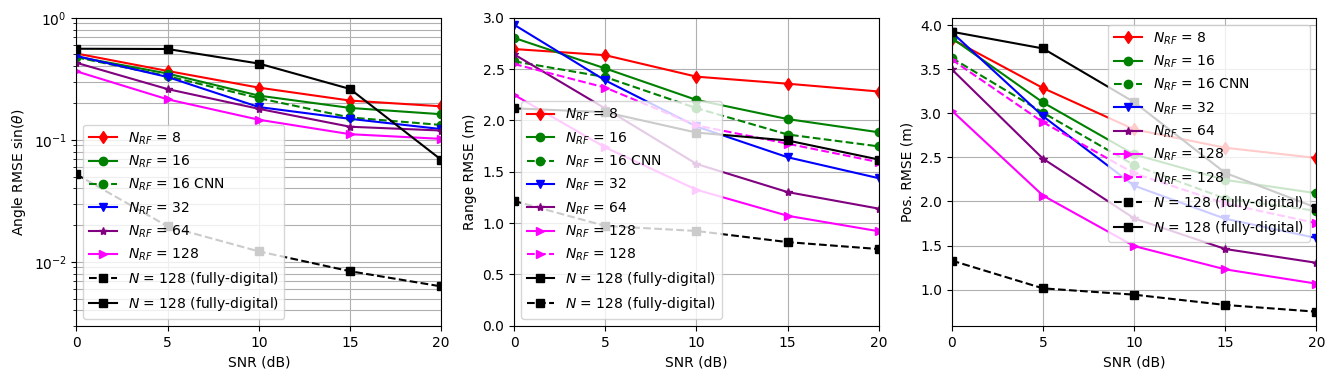

In [41]:
plt.figure(figsize=(16,4))
plt.subplot(132)
# plt.title(r'Hybrid Beamformer (sub-array configuration), $N$ = 128')
# plt.plot(SNR_dB,rmse_dnn_hyb_sub_RF8_rmax10m_N128['Test (r)'],'-dr',    label=r'$N_{RF}$ = 8')
# plt.plot(SNR_dB,rmse_dnn_hyb_sub_RF16_rmax10m_N128['Test (r)'],'-og',   label=r'$N_{RF}$ = 16')
# plt.plot(SNR_dB,rmse_dnn_hyb_sub_RF32_rmax10m_N128['Test (r)'],'-vb',   label=r'$N_{RF}$ = 32')
# plt.plot(SNR_dB,rmse_dnn_hyb_sub_RF64_rmax10m_N128['Test (r)'],'-*',color='purple',label=r'$N_{RF}$ = 64')
plt.plot(SNR_dB,rmse_sub_RF08['Test (r)'],'-dr',    label=r'$N_{RF}$ = 8')
plt.plot(SNR_dB,rmse_sub_RF16['Test (r)'],'-og',   label=r'$N_{RF}$ = 16')
plt.plot(SNR_dB,rmse_CNN_dnn_hyb_sub_RF16_rmax10m_N128['Test (r)'],'--og',   label=r'$N_{RF}$ = 16 CNN')
plt.plot(SNR_dB,rmse_sub_RF32['Test (r)'],'-vb',   label=r'$N_{RF}$ = 32')
plt.plot(SNR_dB,rmse_sub_RF64['Test (r)'],'-*',color='purple',label=r'$N_{RF}$ = 64')
# plt.plot(SNR_dB,rmse_dnn_fully_RF128_rmax10m_N128_256hidden['Test (r)'],'->',color='magenta',label=r'$N_{RF}$ = 128 (larger DNN)')
plt.plot(SNR_dB,rmse_dnn_fully_RF128_rmax10m_N128_decoderNet['Test (r)'],'->',color='magenta',label=r'$N_{RF}$ = 128')
plt.plot(SNR_dB,rmse_CNN_dnn_fullyd_RF16_rmax10m_N128['Val (r)'],'-->',color='magenta',label=r'$N_{RF}$ = 128')
# plt.plot(SNR_dB, maximum_likelihood_N64_rmse_r,'-sk',label=r'$N$ = 64 (fully-digital)')
plt.plot(SNR_dB, rmse_ML['Test (r)'].sort_values()[::-1],'-sk',label=r'$N$ = 128 (fully-digital)')
plt.plot(SNR_dB, maximum_likelihood_N128_rmse_r,'--sk',label=r'$N$ = 128 (fully-digital)')
plt.xticks(SNR_dB)
plt.ylim(y_lim_range)
plt.xlim(x_lim)
plt.xlabel('SNR (dB)')
plt.ylabel('Range RMSE (m)')
plt.legend()
plt.grid()

plt.subplot(131)
# plt.plot(SNR_dB,np.sin(rmse_dnn_hyb_sub_RF8_rmax10m_N128['Test (theta)']/180*np.pi),'-dr',  label=r'$N_{RF}$ = 8')
# plt.plot(SNR_dB,np.sin(rmse_dnn_hyb_sub_RF16_rmax10m_N128['Test (theta)']/180*np.pi),'-og', label=r'$N_{RF}$ = 16')
# plt.plot(SNR_dB,np.sin(rmse_dnn_hyb_sub_RF32_rmax10m_N128['Test (theta)']/180*np.pi),'-vb', label=r'$N_{RF}$ = 32')
# plt.plot(SNR_dB,np.sin(rmse_dnn_hyb_sub_RF64_rmax10m_N128['Test (theta)']/180*np.pi),'-*',color='purple',label=r'$N_{RF}$ = 64')
plt.plot(SNR_dB,np.sin(rmse_sub_RF08['Test (theta)']/180*np.pi),'-dr',    label=r'$N_{RF}$ = 8')
plt.plot(SNR_dB,np.sin(rmse_sub_RF16['Test (theta)']/180*np.pi),'-og',   label=r'$N_{RF}$ = 16')
plt.plot(SNR_dB,np.sin(rmse_CNN_dnn_hyb_sub_RF16_rmax10m_N128['Test (theta)']/180*np.pi),'--og',   label=r'$N_{RF}$ = 16 CNN')
plt.plot(SNR_dB,np.sin(rmse_sub_RF32['Test (theta)']/180*np.pi),'-vb',   label=r'$N_{RF}$ = 32')
plt.plot(SNR_dB,np.sin(rmse_sub_RF64['Test (theta)']/180*np.pi),'-*',color='purple',label=r'$N_{RF}$ = 64')
# plt.plot(SNR_dB,np.sin(rmse_dnn_fully_RF128_rmax10m_N128_256hidden['Test (theta)']/180*np.pi),'->',color='magenta',label=r'$N_{RF}$ = 128 (larger DNN)')
plt.plot(SNR_dB,np.sin(rmse_dnn_fully_RF128_rmax10m_N128_decoderNet['Test (theta)']/180*np.pi),'->',color='magenta',label=r'$N_{RF}$ = 128')
# plt.plot(SNR_dB, np.sin(maximum_likelihood_N64_rmse_theta_rad),'-sk',label=r'$N$ = 64 (fully-digital)')
plt.plot(SNR_dB, np.sin(maximum_likelihood_N128_rmse_theta_rad),'--sk',label=r'$N$ = 128 (fully-digital)')
plt.plot(SNR_dB, np.sin(rmse_ML['Test (theta)'].sort_values()[::-1]/180*np.pi),'-sk',label=r'$N$ = 128 (fully-digital)')
plt.xticks(SNR_dB)
plt.ylim(y_lim_angle)
plt.xlim(x_lim)
plt.yscale('log')
plt.grid(True,which='both')
plt.xlabel('SNR (dB)')
plt.ylabel(r'Angle RMSE sin($\theta$)')
plt.legend()

# plt.subplot(131)
# plt.plot(SNR_dB,rmse_dnn_hyb_sub_RF8_rmax10m_N128['Test (theta)'],'-dr',  label=r'$N_{RF}$ = 8')
# plt.plot(SNR_dB,rmse_dnn_hyb_sub_RF16_rmax10m_N128['Test (theta)'],'-og', label=r'$N_{RF}$ = 16')
# plt.plot(SNR_dB,rmse_dnn_hyb_sub_RF32_rmax10m_N128['Test (theta)'],'-vb', label=r'$N_{RF}$ = 32')
# plt.plot(SNR_dB,rmse_dnn_hyb_sub_RF64_rmax10m_N128['Test (theta)'],'-*',color='purple',label=r'$N_{RF}$ = 64')
# plt.plot(SNR_dB, maximum_likelihood_N64_rmse_theta_deg,'-sk',label=r'$N$ = 64 (fully-digital)')
# plt.xticks(SNR_dB)
# # plt.ylim(y_lim_angle)
# plt.xlim(x_lim)
# # plt.yscale('log')
# plt.grid(True,which='both')
# plt.xlabel('SNR (dB)')
# plt.ylabel(r'RMSE ($\theta$)')
# plt.legend()

# RMSE POSITION
plt.subplot(133)
# plt.plot(SNR_dB,rmse_dnn_hyb_sub_RF8_rmax10m_N128['Test (pos)'],'-dr',    label=r'$N_{RF}$ = 8')
# plt.plot(SNR_dB,rmse_dnn_hyb_sub_RF16_rmax10m_N128['Test (pos)'],'-og',   label=r'$N_{RF}$ = 16')
# plt.plot(SNR_dB,rmse_dnn_hyb_sub_RF32_rmax10m_N128['Test (pos)'],'-vb',   label=r'$N_{RF}$ = 32')
# plt.plot(SNR_dB,rmse_dnn_hyb_sub_RF64_rmax10m_N128['Test (pos)'],'-*',color='purple',label=r'$N_{RF}$ = 64')
plt.plot(SNR_dB,rmse_sub_RF08['Test (pos)'],'-dr',    label=r'$N_{RF}$ = 8')
plt.plot(SNR_dB,rmse_sub_RF16['Test (pos)'],'-og',   label=r'$N_{RF}$ = 16')
plt.plot(SNR_dB,rmse_CNN_dnn_hyb_sub_RF16_rmax10m_N128['Test (pos)'],'--og',   label=r'$N_{RF}$ = 16 CNN')
plt.plot(SNR_dB,rmse_sub_RF32['Test (pos)'],'-vb',   label=r'$N_{RF}$ = 32')
plt.plot(SNR_dB,rmse_sub_RF64['Test (pos)'],'-*',color='purple',label=r'$N_{RF}$ = 64')
# plt.plot(SNR_dB,rmse_dnn_hyb_sub_RF64_rmax10m_N128_256hidden['Test (pos)'],'--*',color='purple',label=r'$N_{RF}$ = 64')
# plt.plot(SNR_dB,rmse_dnn_fully_RF128_rmax10m_N128_256hidden['Test (pos)'],'->',color='magenta',label=r'$N_{RF}$ = 128 (larger DNN)')
plt.plot(SNR_dB,rmse_dnn_fully_RF128_rmax10m_N128_decoderNet['Test (pos)'],'->',color='magenta',label=r'$N_{RF}$ = 128')
plt.plot(SNR_dB,rmse_CNN_dnn_fullyd_RF16_rmax10m_N128['Val (pos)'],'-->',color='magenta',label=r'$N_{RF}$ = 128')
# plt.plot(SNR_dB, maximum_likelihood_N64_rmse_pos,'-sk',label=r'$N$ = 64 (fully-digital)')
plt.plot(SNR_dB, maximum_likelihood_N128_rmse_pos,'--sk',label=r'$N$ = 128 (fully-digital)')
plt.plot(SNR_dB, rmse_ML['Test (pos)'].sort_values()[::-1],'-sk',label=r'$N$ = 128 (fully-digital)')
plt.xticks(SNR_dB)
# plt.ylim(y_lim_range)
plt.xlim(x_lim)
plt.grid(True,which='both')
plt.xlabel('SNR (dB)')
plt.ylabel('Pos. RMSE (m)')
plt.legend()
plt.show()

### Training the DNN with Different SNR Distributions

To maintain a consistent total dataset size of 100k samples, the DNN was trained under two different scenarios:

**Case 1**: Uniform SNR Distribution
- **SNR Values:** {0, 5, 10, 15, 20} dB
- **Samples per SNR:** 20k
- **Total Dataset Size:** 20k * 5 = 100k samples

**Case 2**: Focused on High SNR
- **SNR Values:** {15, 20} dB
- **Samples per SNR:** 50k
- **Total Dataset Size:** 50k * 2 = 100k samples


ValueError: x and y must have same first dimension, but have shapes (2,) and (5,)

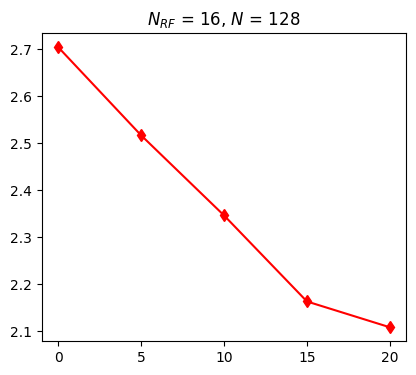

In [74]:
plt.figure(figsize=(16,4))
plt.subplot(132)
plt.title(r'$N_{RF}$ = 16, $N$ = 128')
plt.plot(SNR_dB,rmse_dnn_hyb_sub_RF16_rmax10m_N128['Test (r)'],'-dr',label='sub-con')
plt.plot(SNR_dB[-2:],rmse_dnn_hyb_sub_RF16_rmax10m_N128_high_snr['Test (r)'],'-.db',label='sub-con (high SNR)')
plt.plot(SNR_dB, maximum_likelihood_N128_rmse_r,'-sk',label=f'fully-digital')
plt.xticks(SNR_dB)
plt.ylim(y_lim_range)
plt.xlim(x_lim)
plt.xlabel('SNR (dB)')
plt.ylabel('Range RMSE (m)')
plt.legend()
plt.grid()

# RMSE ANGLE
plt.subplot(131)
plt.title(r'$N_{RF}$ = 16, $N$ = 128')

plt.plot(SNR_dB,np.sin(rmse_dnn_hyb_sub_RF16_rmax10m_N128['Test (theta)']/180*np.pi),'-dr',label='sub-con')
plt.plot(SNR_dB[-2:],np.sin(rmse_dnn_hyb_sub_RF16_rmax10m_N128_high_snr['Test (theta)']/180*np.pi),'-.db',label='sub-con (high SNR)')
plt.plot(SNR_dB, np.sin(maximum_likelihood_N128_rmse_theta_rad),'-sk',label=f'fully-digital')
plt.xticks(SNR_dB)
plt.yscale('log')
plt.ylim(y_lim_angle)
plt.xlim(x_lim)
plt.grid(True,which='both')
plt.xlabel('SNR (dB)')
plt.ylabel(r'Angle RMSE sin($\theta$)')
plt.legend()

# plt.subplot(131)
# plt.title(r'$N_{RF}$ = 16, $N$ = 128')
# plt.plot(SNR_dB,rmse_dnn_hyb_sub_RF16_rmax10m_N128['Test (theta)'],'-dr',label='sub-con')
# plt.plot(SNR_dB[-2:],rmse_dnn_hyb_sub_RF16_rmax10m_N128_high_snr['Test (theta)'],'-.db',label='sub-con (high SNR)')
# plt.plot(SNR_dB, maximum_likelihood_N128_rmse_theta_deg,'-sk',label=f'fully-digital')
# plt.xticks(SNR_dB)
# # plt.yscale('log')
# # plt.ylim(y_lim_angle)
# plt.xlim(x_lim)
# plt.grid(True,which='both')
# plt.xlabel('SNR (dB)')
# plt.ylabel(r'RMSE ($\theta$)')
# plt.legend()

plt.subplot(133)
plt.title(r'$N_{RF}$ = 16, $N$ = 128')
plt.plot(SNR_dB,rmse_dnn_hyb_sub_RF16_rmax10m_N128['Test (pos)'],'-dr',label='sub-con')
plt.plot(SNR_dB[-2:],rmse_dnn_hyb_sub_RF16_rmax10m_N128_high_snr['Test (pos)'],'-.db',label='sub-con (high SNR)')
plt.plot(SNR_dB, maximum_likelihood_N128_rmse_pos,'-sk',label=f'fully-digital')
plt.xticks(SNR_dB)
# plt.ylim(y_lim_range)
plt.xlim(x_lim)
plt.xlabel('SNR (dB)')
plt.ylabel('Pos. RMSE (m)')
plt.legend()
plt.grid()
plt.show()

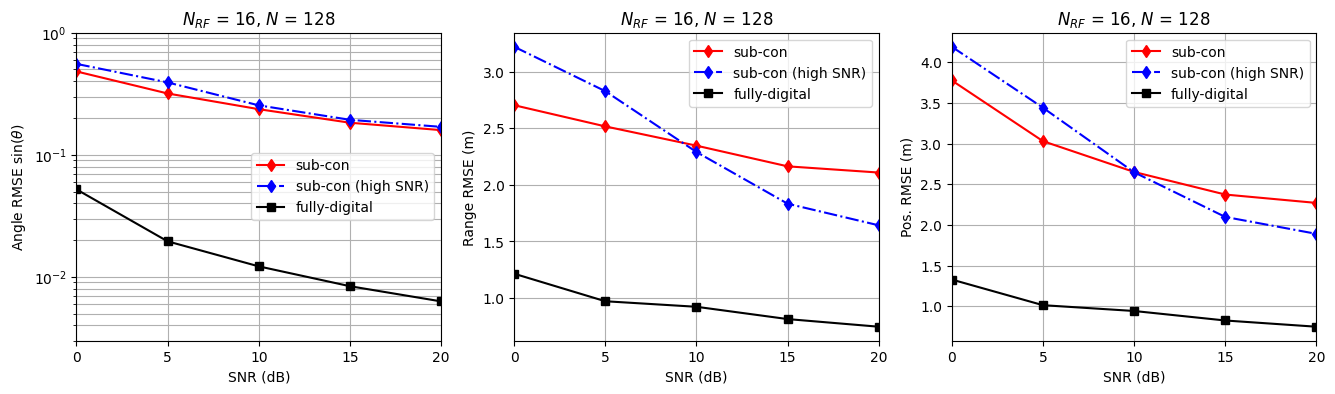

In [108]:
plt.figure(figsize=(16,4))
plt.subplot(132)
plt.title(r'$N_{RF}$ = 16, $N$ = 128')
plt.plot(SNR_dB,rmse_dnn_hyb_sub_RF16_rmax10m_N128['Test (r)'],'-dr',label='sub-con')
plt.plot(SNR_dB,rmse_dnn_hyb_sub_RF16_rmax10m_N128_high_snr['Test (r)'],'-.db',label='sub-con (high SNR)')
plt.plot(SNR_dB, maximum_likelihood_N128_rmse_r,'-sk',label=f'fully-digital')
plt.xticks(SNR_dB)
# plt.ylim(y_lim_range)
plt.xlim(x_lim)
plt.xlabel('SNR (dB)')
plt.ylabel('Range RMSE (m)')
plt.legend()
plt.grid()

# RMSE ANGLE
plt.subplot(131)
plt.title(r'$N_{RF}$ = 16, $N$ = 128')

plt.plot(SNR_dB,np.sin(rmse_dnn_hyb_sub_RF16_rmax10m_N128['Test (theta)']/180*np.pi),'-dr',label='sub-con')
plt.plot(SNR_dB,np.sin(rmse_dnn_hyb_sub_RF16_rmax10m_N128_high_snr['Test (theta)']/180*np.pi),'-.db',label='sub-con (high SNR)')
plt.plot(SNR_dB, np.sin(maximum_likelihood_N128_rmse_theta_rad),'-sk',label=f'fully-digital')
plt.xticks(SNR_dB)
plt.yscale('log')
plt.ylim(y_lim_angle)
plt.xlim(x_lim)
plt.grid(True,which='both')
plt.xlabel('SNR (dB)')
plt.ylabel(r'Angle RMSE sin($\theta$)')
plt.legend()

# plt.subplot(131)
# plt.title(r'$N_{RF}$ = 16, $N$ = 128')
# plt.plot(SNR_dB,rmse_dnn_hyb_sub_RF16_rmax10m_N128['Test (theta)'],'-dr',label='sub-con')
# plt.plot(SNR_dB[-2:],rmse_dnn_hyb_sub_RF16_rmax10m_N128_high_snr['Test (theta)'],'-.db',label='sub-con (high SNR)')
# plt.plot(SNR_dB, maximum_likelihood_N128_rmse_theta_deg,'-sk',label=f'fully-digital')
# plt.xticks(SNR_dB)
# # plt.yscale('log')
# # plt.ylim(y_lim_angle)
# plt.xlim(x_lim)
# plt.grid(True,which='both')
# plt.xlabel('SNR (dB)')
# plt.ylabel(r'RMSE ($\theta$)')
# plt.legend()

plt.subplot(133)
plt.title(r'$N_{RF}$ = 16, $N$ = 128')
plt.plot(SNR_dB,rmse_dnn_hyb_sub_RF16_rmax10m_N128['Test (pos)'],'-dr',label='sub-con')
plt.plot(SNR_dB,rmse_dnn_hyb_sub_RF16_rmax10m_N128_high_snr['Test (pos)'],'-.db',label='sub-con (high SNR)')
plt.plot(SNR_dB, maximum_likelihood_N128_rmse_pos,'-sk',label=f'fully-digital')
plt.xticks(SNR_dB)
# plt.ylim(y_lim_range)
plt.xlim(x_lim)
plt.xlabel('SNR (dB)')
plt.ylabel('Pos. RMSE (m)')
plt.legend()
plt.grid()
plt.show()

# Multipath
Compared to the previous setup, we further consider a scenario where the ...

We consider the effect of multipath through an additional scatterer, simulating the strongest component of the multipath.

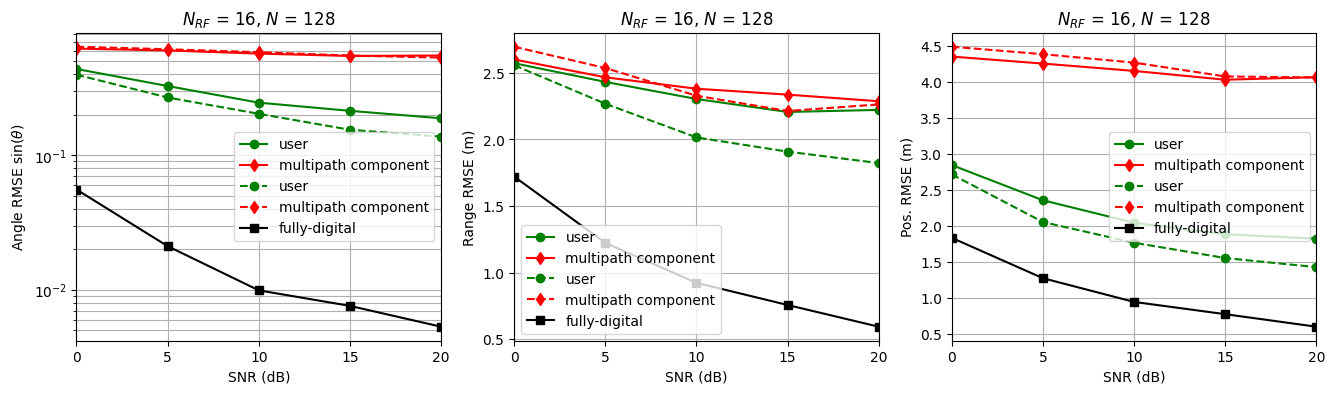

In [106]:
plt.figure(figsize=(16,4))
plt.subplot(132)
plt.title(r'$N_{RF}$ = 16, $N$ = 128')
# plt.plot(SNR_dB,rmse_dnn_hyb_sub_RF16_rmax10m_N128['Test (r)'],'-dr',label='sub-con')
plt.plot(SNR_dB,rmse_dnn_hyb_sub_RF16_rmax10m_N128_multipath['Test (r)'],'-og',label='user')
plt.plot(SNR_dB,rmse_dnn_hyb_sub_RF16_rmax10m_N128_multipath['Test (r_scat)'],'-dr',label='multipath component')
plt.plot(SNR_dB,rmse_dnn_hyb_sub_RF64_rmax10m_N128_multipath_256hidden['Test (r)'],'--og',label='user')
plt.plot(SNR_dB,rmse_dnn_hyb_sub_RF64_rmax10m_N128_multipath_256hidden['Test (r_scat)'],'--dr',label='multipath component')
plt.plot(SNR_dB, maximum_likelihood_N64_rmse_r,'-sk',label=f'fully-digital')
plt.xticks(SNR_dB)
# plt.ylim(y_lim_range)
plt.xlim(x_lim)
plt.xlabel('SNR (dB)')
plt.ylabel('Range RMSE (m)')
plt.legend()
plt.grid()

# RMSE ANGLE
plt.subplot(131)
plt.title(r'$N_{RF}$ = 16, $N$ = 128')

# plt.plot(SNR_dB,np.sin(rmse_dnn_hyb_sub_RF16_rmax10m_N128['Test (theta)']/180*np.pi),'-dr',label='sub-con')
plt.plot(SNR_dB,np.sin(rmse_dnn_hyb_sub_RF16_rmax10m_N128_multipath['Test (theta)']/180*np.pi),'-og',label='user')
plt.plot(SNR_dB,np.sin(rmse_dnn_hyb_sub_RF16_rmax10m_N128_multipath['Test (theta_scat)']/180*np.pi),'-dr',label='multipath component')
plt.plot(SNR_dB,np.sin(rmse_dnn_hyb_sub_RF64_rmax10m_N128_multipath_256hidden['Test (theta)']/180*np.pi),'--og',label='user')
plt.plot(SNR_dB,np.sin(rmse_dnn_hyb_sub_RF64_rmax10m_N128_multipath_256hidden['Test (theta_scat)']/180*np.pi),'--dr',label='multipath component')
plt.plot(SNR_dB, np.sin(maximum_likelihood_N64_rmse_theta_rad),'-sk',label=f'fully-digital')
plt.xticks(SNR_dB)
plt.yscale('log')
# plt.ylim(y_lim_angle)
plt.xlim(x_lim)
plt.grid(True,which='both')
plt.xlabel('SNR (dB)')
plt.ylabel(r'Angle RMSE sin($\theta$)')
plt.legend()

# plt.plot(SNR_dB,rmse_dnn_hyb_sub_RF16_rmax10m_N128_multipath['Test (theta)'],'-og',label='user')
# plt.plot(SNR_dB,rmse_dnn_hyb_sub_RF16_rmax10m_N128_multipath['Test (theta_scat)'],'-dr',label='multipath component')
# plt.plot(SNR_dB, maximum_likelihood_N128_rmse_theta_deg,'-sk',label=f'fully-digital')
# plt.xticks(SNR_dB)
# # plt.yscale('log')
# # plt.ylim(y_lim_angle)
# plt.xlim(x_lim)
# plt.grid(True,which='both')
# plt.xlabel('SNR (dB)')
# plt.ylabel(r'RMSE ($\theta$)')
# plt.legend()

plt.subplot(133)
plt.title(r'$N_{RF}$ = 16, $N$ = 128')
# plt.plot(SNR_dB,rmse_dnn_hyb_sub_RF16_rmax10m_N128['Test (pos)'],'-dr',label='sub-con')
plt.plot(SNR_dB,rmse_dnn_hyb_sub_RF16_rmax10m_N128_multipath['Test (pos)'],'-og',label='user')
plt.plot(SNR_dB,rmse_dnn_hyb_sub_RF16_rmax10m_N128_multipath['Test (pos_scat)'],'-dr',label='multipath component')
plt.plot(SNR_dB,rmse_dnn_hyb_sub_RF64_rmax10m_N128_multipath_256hidden['Test (pos)'],'--og',label='user')
plt.plot(SNR_dB,rmse_dnn_hyb_sub_RF64_rmax10m_N128_multipath_256hidden['Test (pos_scat)'],'--dr',label='multipath component')
plt.plot(SNR_dB, maximum_likelihood_N64_rmse_pos,'-sk',label=f'fully-digital')
plt.xticks(SNR_dB)
# plt.ylim(y_lim_range)
plt.xlim(x_lim)
plt.xlabel('SNR (dB)')
plt.ylabel('Pos. RMSE (m)')
plt.legend()
plt.grid()
plt.show()